# Data analysis and processing

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [15]:
# read the data
df = pd.read_csv("merged_spotify_muse.csv")

#### Converting sentiments to a list

Analysing the merged_spotify_muse csv file, we found out that the sentiments are stored in a weirdly formatted string that looks like a string, so to make the process easier, we will first convert it to an actual list.

A data point for sentiments looks like the following: ["sentiment_1", "sentiment_2", "sentiment_3"]
Since this is a string, we need to do the following:
1. Remove the brackets from the string
2. make a list by delimiting the string using ','
3. Remove the quotation marks from the sentiment names and make a new list
4. Change the data point at each row

In [16]:
i = 0
for row in df['sentiments']:
    df.at[i,'sentiments'] = [word[1:-1] for word in row[1:-1].split(", ")]
    i += 1

In [20]:
df = df.drop(columns=['no_of_tags', 'Unnamed: 0'])
df

,id,title,artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,sentiments
0,4xkOaSrkexMciUUogZKVTS,'Till I Collapse,Eminem,0.548,0.847,1,-3.237,1,0.06220,0.000000,0.0816,0.1000,171.447,297787,4,[aggressive]
1,3fOc9x06lKJBhz435mInlH,St. Anger,Metallica,0.249,0.949,2,-2.642,0,0.00131,0.022800,0.0953,0.4980,185.252,441133,4,[aggressive]
2,3Y96xd4Ce0J47dcalLrEC8,Speedin',Rick Ross,0.668,0.787,1,-4.226,1,0.10900,0.000000,0.2100,0.4780,100.059,204960,4,[aggressive]
3,6tqFC1DIOphJkCwrjVzPmg,Bamboo Banga,M.I.A.,0.805,0.918,9,-4.554,1,0.04930,0.000000,0.0691,0.7130,125.984,298360,4,"[aggressive, fun, sexy, energetic]"
4,5bU4KX47KqtDKKaLM4QCzh,Die MF Die,Dope,0.657,0.960,5,-3.524,0,0.00169,0.000997,0.1090,0.5670,126.020,186067,4,[aggressive]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61625,2bRIsZ92JRKlvQOZlyR9CO,Secret,Quietdrive,0.396,0.915,0,-5.126,0,0.03340,0.000000,0.1350,0.0734,167.996,258373,4,[transparent]
61626,7o3Np7cho9cBCrNDokxzYC,The Last of the Rest Was the End,Medications,0.244,0.866,2,-5.774,0,0.00433,0.072200,0.0782,0.3400,144.844,324000,3,[transparent]
61627,4fVObxldDzxxRD6a5Eth9s,Lovechild,Daniel Lanois,0.236,0.107,10,-20.091,0,0.90100,0.748000,0.1120,0.0720,79.476,516280,4,[transparent]
61628,5WxwRwUQ4R4L46VEm3213y,Last Inhale,Tapage,0.542,0.909,2,-8.977,0,0.07180,0.817000,0.1250,0.0552,160.011,324258,4,[transparent]


Next we will check if the data has any duplicates or any rows with empty sentiment values, and then drop those

In [24]:
print(df.size)
df = df.drop_duplicates(subset="id")
print(df.size)
df = df.dropna(subset=['sentiments'])
print(df.size)

986080
967376
967376


Since the size of the dataframe has reduced, we know that we need to reset the index of the dataframe

In [27]:
df = df.reset_index(drop = True)
df

,id,title,artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,sentiments
0,4xkOaSrkexMciUUogZKVTS,'Till I Collapse,Eminem,0.548,0.847,1,-3.237,1,0.06220,0.000000,0.0816,0.1000,171.447,297787,4,[aggressive]
1,3fOc9x06lKJBhz435mInlH,St. Anger,Metallica,0.249,0.949,2,-2.642,0,0.00131,0.022800,0.0953,0.4980,185.252,441133,4,[aggressive]
2,3Y96xd4Ce0J47dcalLrEC8,Speedin',Rick Ross,0.668,0.787,1,-4.226,1,0.10900,0.000000,0.2100,0.4780,100.059,204960,4,[aggressive]
3,6tqFC1DIOphJkCwrjVzPmg,Bamboo Banga,M.I.A.,0.805,0.918,9,-4.554,1,0.04930,0.000000,0.0691,0.7130,125.984,298360,4,"[aggressive, fun, sexy, energetic]"
4,5bU4KX47KqtDKKaLM4QCzh,Die MF Die,Dope,0.657,0.960,5,-3.524,0,0.00169,0.000997,0.1090,0.5670,126.020,186067,4,[aggressive]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60456,2bRIsZ92JRKlvQOZlyR9CO,Secret,Quietdrive,0.396,0.915,0,-5.126,0,0.03340,0.000000,0.1350,0.0734,167.996,258373,4,[transparent]
60457,7o3Np7cho9cBCrNDokxzYC,The Last of the Rest Was the End,Medications,0.244,0.866,2,-5.774,0,0.00433,0.072200,0.0782,0.3400,144.844,324000,3,[transparent]
60458,4fVObxldDzxxRD6a5Eth9s,Lovechild,Daniel Lanois,0.236,0.107,10,-20.091,0,0.90100,0.748000,0.1120,0.0720,79.476,516280,4,[transparent]
60459,5WxwRwUQ4R4L46VEm3213y,Last Inhale,Tapage,0.542,0.909,2,-8.977,0,0.07180,0.817000,0.1250,0.0552,160.011,324258,4,[transparent]


In [29]:
mySentiments = {word:0 for row in df['sentiments'] for word in row}
mySentiments

{'aggressive': 0,
 'fun': 0,
 'sexy': 0,
 'energetic': 0,
 'angry': 0,
 'bitter': 0,
 'epic': 0,
 'driving': 0,
 'intense': 0,
 'uplifting': 0,
 'confrontational': 0,
 'desperate': 0,
 'fierce': 0,
 'soft': 0,
 'powerful': 0,
 'cold': 0,
 'gritty': 0,
 'warm': 0,
 'flowing': 0,
 'smooth': 0,
 'exciting': 0,
 'hostile': 0,
 'cathartic': 0,
 'fiery': 0,
 'raucous': 0,
 'volatile': 0,
 'relaxed': 0,
 'brash': 0,
 'wry': 0,
 'carefree': 0,
 'freewheeling': 0,
 'detached': 0,
 'sparkling': 0,
 'irreverent': 0,
 'summery': 0,
 'bright': 0,
 'messy': 0,
 'sprawling': 0,
 'quirky': 0,
 'rambunctious': 0,
 'calm': 0,
 'laid-back': 0,
 'cynical': 0,
 'ethereal': 0,
 'atmospheric': 0,
 'hypnotic': 0,
 'trippy': 0,
 'explosive': 0,
 'silly': 0,
 'sweet': 0,
 'nostalgic': 0,
 'tense': 0,
 'dark': 0,
 'technical': 0,
 'spooky': 0,
 'exotic': 0,
 'witty': 0,
 'manic': 0,
 'urgent': 0,
 'dramatic': 0,
 'complex': 0,
 'reflective': 0,
 'searching': 0,
 'gutsy': 0,
 'rousing': 0,
 'eerie': 0,
 'bleak': 

In [30]:
for row in df['sentiments']:
    for word in row:
        mySentiments[word] += 1

In [31]:
mySentiments

{'aggressive': 820,
 'fun': 917,
 'sexy': 908,
 'energetic': 873,
 'angry': 869,
 'bitter': 491,
 'epic': 925,
 'driving': 696,
 'intense': 884,
 'uplifting': 887,
 'confrontational': 107,
 'desperate': 163,
 'fierce': 575,
 'soft': 891,
 'powerful': 841,
 'cold': 614,
 'gritty': 591,
 'warm': 851,
 'flowing': 241,
 'smooth': 882,
 'exciting': 358,
 'hostile': 27,
 'cathartic': 251,
 'fiery': 119,
 'raucous': 49,
 'volatile': 66,
 'relaxed': 688,
 'brash': 103,
 'wry': 118,
 'carefree': 177,
 'freewheeling': 81,
 'detached': 128,
 'sparkling': 82,
 'irreverent': 24,
 'summery': 235,
 'bright': 519,
 'messy': 112,
 'sprawling': 35,
 'quirky': 868,
 'rambunctious': 45,
 'calm': 901,
 'laid-back': 123,
 'cynical': 671,
 'ethereal': 851,
 'atmospheric': 925,
 'hypnotic': 845,
 'trippy': 683,
 'explosive': 131,
 'silly': 817,
 'sweet': 896,
 'nostalgic': 837,
 'tense': 172,
 'dark': 917,
 'technical': 500,
 'spooky': 716,
 'exotic': 632,
 'witty': 650,
 'manic': 139,
 'urgent': 187,
 'drama

#### Visualising the data

To see whether the dataset is imbalanced or has any biases

In [32]:
import scipy.stats as ss

In [33]:
rankedValues = ss.rankdata(list(mySentiments.values()), method = 'ordinal')
totalVal = len(rankedValues)
myValues = list(mySentiments.values())
myKeys = list(mySentiments.keys())
rankedValues = rankedValues - 1
sortedKeys = ["",]*totalVal
sortedVals = [0,]*totalVal
for i, rank in enumerate(rankedValues):
    sortedKeys[rank] = myKeys[i]
    sortedVals[rank] = myValues[i]

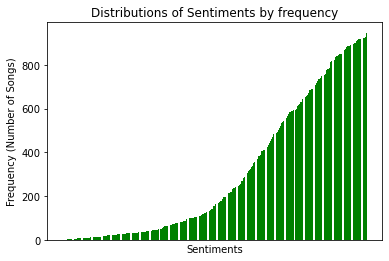

In [83]:
sortedKeys = sortedKeys[::-1]
sortedVals = sortedVals[::-1]
plt.bar(sortedKeys, sortedVals, color='g')
plt.title("Distributions of Sentiments by frequency")
plt.ylabel("Frequency (Number of Songs)")
plt.xlabel("Sentiments")
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
plt.show()

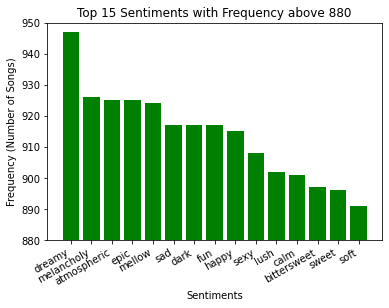

In [37]:
plt.bar(sortedKeys[:15], sortedVals[:15], color='g')
plt.ylim([880, 950])
ax= plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.title("Top 15 Sentiments with Frequency above 880")
plt.xlabel("Sentiments")
plt.ylabel("Frequency (Number of Songs)")
plt.show()

#### Remove any songs with multiple sentiments

We realised that for our first model, it would be best to work with a simpler dataset that classifies data to a singular value. Thus, it made the most sense to remove any data points with more than one sentiment associated with it.

In [59]:
single_data = df.copy()
for i in range(df.shape[0]):
  if len(df['sentiments'][i]) != 1:
    single_data = single_data.drop(index=i)

In [71]:
single_data = single_data.reset_index(drop = True)

In [79]:
for i in range(len(single_data)):
  single_data['sentiments'][i] = single_data['sentiments'][i][0]

/var/folders/qm/b4r315zd3yj44nvm6xllpd940000gn/T/ipykernel_1298/3038854826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_data['sentiments'][i] = single_data['sentiments'][i][0]


In [80]:
single_data = single_data.dropna(subset=['sentiments'])

In [81]:
single_data.to_csv("single_value_sentiment.csv")

#### Figuring out the biases in the new dataset

In [88]:
mySingleSentiments = {word:0 for word in single_data['sentiments']}
for word in single_data['sentiments']:
    mySingleSentiments[word] += 1
mySingleSentiments

{'aggressive': 605,
 'angry': 588,
 'angst-ridden': 7,
 'confrontational': 15,
 'defiant': 46,
 'demonic': 39,
 'explosive': 76,
 'fierce': 445,
 'harsh': 221,
 'hostile': 8,
 'hyper': 182,
 'intense': 442,
 'malevolent': 4,
 'manic': 81,
 'menacing': 131,
 'nihilistic': 14,
 'ominous': 182,
 'outraged': 1,
 'outrageous': 10,
 'provocative': 59,
 'rebellious': 48,
 'reckless': 14,
 'savage': 57,
 'uncompromising': 7,
 'unsettling': 37,
 'visceral': 13,
 'volatile': 10,
 'apocalyptic': 160,
 'dark': 455,
 'eerie': 460,
 'feral': 1,
 'fractured': 30,
 'gloomy': 512,
 'halloween': 328,
 'macabre': 70,
 'paranoid': 176,
 'scary': 335,
 'spooky': 437,
 'suffocating': 1,
 'suspenseful': 7,
 'threatening': 2,
 'urgent': 95,
 'bitter': 343,
 'bleak': 115,
 'brittle': 14,
 'cold': 429,
 'grim': 67,
 'lonely': 442,
 'nocturnal': 262,
 'delicate': 301,
 'dreamy': 342,
 'ethereal': 353,
 'gentle': 446,
 'intimate': 327,
 'introspective': 264,
 'languid': 1,
 'lazy': 538,
 'meditative': 395,
 'past

In [89]:
rankedValues = ss.rankdata(list(mySingleSentiments.values()), method = 'ordinal')
totalVal = len(rankedValues)
myValues = list(mySingleSentiments.values())
myKeys = list(mySingleSentiments.keys())
rankedValues = rankedValues - 1
sortedKeys = ["",]*totalVal
sortedVals = [0,]*totalVal
for i, rank in enumerate(rankedValues):
    sortedKeys[rank] = myKeys[i]
    sortedVals[rank] = myValues[i]

sortedKeys = sortedKeys[::-1]
sortedVals = sortedVals[::-1]

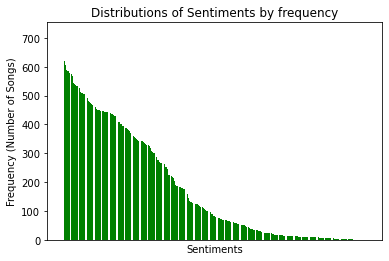

In [90]:
plt.bar(sortedKeys, sortedVals, color='g')
plt.title("Distributions of Sentiments by frequency")
plt.ylabel("Frequency (Number of Songs)")
plt.xlabel("Sentiments")
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
plt.show()

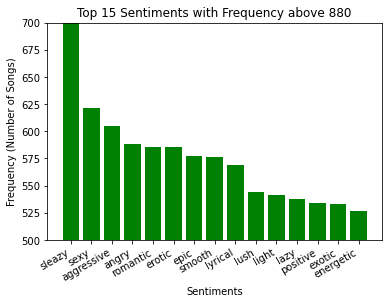

In [94]:
plt.bar(sortedKeys[:15], sortedVals[:15], color='g')
plt.ylim([500, 700])
ax= plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.title("Top 15 Sentiments with Frequency above 500")
plt.xlabel("Sentiments")
plt.ylabel("Frequency (Number of Songs)")
plt.show()

### Check what features are important

To do this, we'll be plotting violin plots for two sentiments with contridictory feels

In [2]:
single_data = pd.read_csv("single_value_sentiment.csv")

In [8]:
def CreateData(feature):
    return single_data[single_data['sentiments'].isin([feature])].reset_index(drop=True).drop(columns=['Unnamed: 0'])

In [9]:
happy = CreateData('happy').reset_index(drop=True)
sad = CreateData('sad').reset_index(drop=True)
romantic = CreateData('romantic').reset_index(drop=True)
aggressive = CreateData('aggressive').reset_index(drop=True)
sexy = CreateData('sexy').reset_index(drop=True)
soothing = CreateData('soothing').reset_index(drop=True)
angry = CreateData('angry').reset_index(drop=True)
anxious = CreateData('anxious').reset_index(drop=True)

In [11]:
len(anxious)

35

In [41]:
# function to use on different features to make violin plots
def PlotViolin(subset1, subset2, subset3, subset4, subset5, subset6, subset7, subset8, feature):
    fig, (ax1,ax2, ax3,ax4, ax5,ax6, ax7,ax8) = plt.subplots(nrows=1, ncols=8)

    ax1.violinplot(subset1[feature])
    # ax1.set_title('{set} {feature}'.format(set=subset1['sentiments'][0], feature=feature))
    ax1.set_title('{set}'.format(set=subset1['sentiments'][0]))

    ax2.violinplot(subset2[feature])
    # ax2.set_title('{set} {feature}'.format(set=subset2['sentiments'][0], feature=feature))
    ax2.set_title('{set}'.format(set=subset2['sentiments'][0]))

    ax3.violinplot(subset3[feature])
    # ax3.set_title('{set} {feature}'.format(set=subset3['sentiments'][0], feature=feature))
    ax3.set_title('{set}'.format(set=subset3['sentiments'][0]))

    ax4.violinplot(subset4[feature])
    # ax4.set_title('{set} {feature}'.format(set=subset4['sentiments'][0], feature=feature))
    ax4.set_title('{set}'.format(set=subset4['sentiments'][0]))

    ax5.violinplot(subset5[feature])
    # ax5.set_title('{set} {feature}'.format(set=subset5['sentiments'][0], feature=feature))
    ax5.set_title('{set}'.format(set=subset5['sentiments'][0]))

    ax6.violinplot(subset6[feature])
    # ax6.set_title('{set} {feature}'.format(set=subset6['sentiments'][0], feature=feature))
    ax6.set_title('{set}'.format(set=subset6['sentiments'][0]))

    ax7.violinplot(subset7[feature])
    # ax7.set_title('{set} {feature}'.format(set=subset7['sentiments'][0], feature=feature))
    ax7.set_title('{set}'.format(set=subset7['sentiments'][0]))

    ax8.violinplot(subset8[feature])
    # ax8.set_title('{set} {feature}'.format(set=subset8['sentiments'][0], feature=feature))
    ax8.set_title('{set}'.format(set=subset8['sentiments'][0]))

    ymin = 0 # find min value of y in all plots
    ymax = 0 # find max value of y in all plots

    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2.5, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)
    
    plt.axis([None, None, ymin, ymax])

    plt.show()

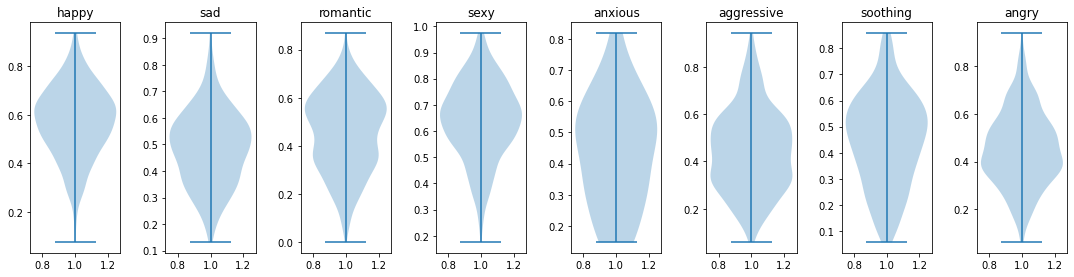

In [42]:
PlotViolin(happy, sad, romantic, sexy, anxious, aggressive, soothing, angry, 'danceability')

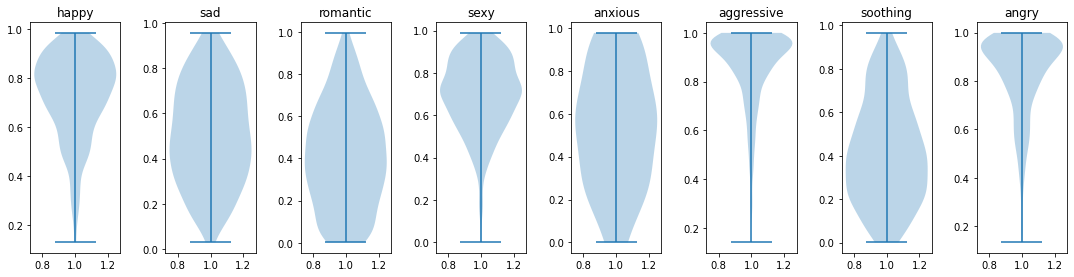

In [43]:
PlotViolin(happy, sad, romantic, sexy, anxious, aggressive, soothing, angry, 'energy')

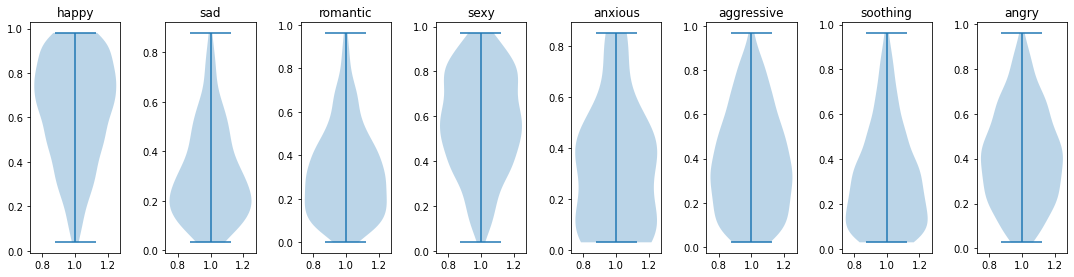

In [44]:
PlotViolin(happy, sad, romantic, sexy, anxious, aggressive, soothing, angry, 'valence')

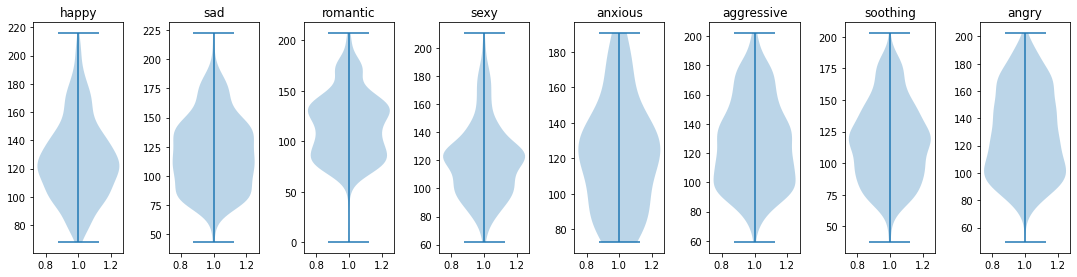

In [45]:
PlotViolin(happy, sad, romantic, sexy, anxious, aggressive, soothing, angry, 'tempo')

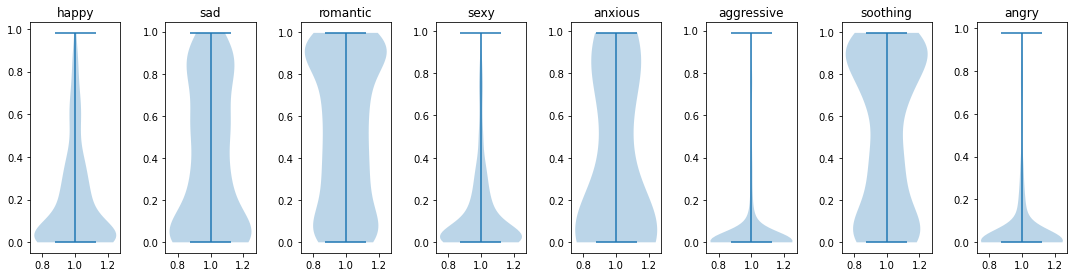

In [46]:
PlotViolin(happy, sad, romantic, sexy, anxious, aggressive, soothing, angry, 'acousticness')

##### final list of features that matter

energy, valence, acousticness, danceability, tempo

In [105]:
# creating a dataset with only soothing and angry to create a dummy ML model to judge the scope of the project
# reducing the size of angry to ensure model is not biased

angry = angry[:len(soothing)].reset_index(drop = True)
angry_soothing = pd.concat([angry, soothing])

In [107]:
angry_soothing.to_csv("angry_soothing_test.csv")